In [34]:
import numpy as np
data = np.loadtxt("data.csv",delimiter=",")

In [40]:
x = data[:,0]
y = data[:,1]

In [41]:
from sklearn import model_selection
X_train, X_test, Y_train,Y_test = model_selection.train_test_split(x,y,test_size = 0.3)

In [42]:
def fit(x,y):
    numerator = (x*y).mean() - x.mean()*y.mean()
    denominator = (x*x).mean() - x.mean()**2
    m = numerator / denominator
    c = y.mean() - m* x.mean()
    return m,c

In [43]:
def predict(x,m,c):
    return m*x + c;
def score(Y_true,Y_predict):
    u = ((Y_true - Y_predict)**2).sum()
    v = ((Y_true - Y_true.mean())**2).sum()
    return  1 - (u/v)

In [50]:
def cost(x,y,m,c):
    return ((y-(m*x-c))**2).mean()

In [51]:
m , c= fit(X_train,Y_train)
#test data
Y_test_predict = predict(X_test,m,c)
print("Test Score: ",score(Y_test,Y_test_predict))
#train data
Y_train_predict = predict(X_train,m,c)
print("Train Score: ",score(Y_train,Y_train_predict))
print("M: ",m ," C: ", c)
print("Cost on training Data: ", cost(X_test,Y_test,m,c))

Test Score:  0.6011551963450057
Train Score:  0.5946195814459148
M:  1.3345792564353482  C:  7.976302496802035
Cost on training Data:  329.04974815500907


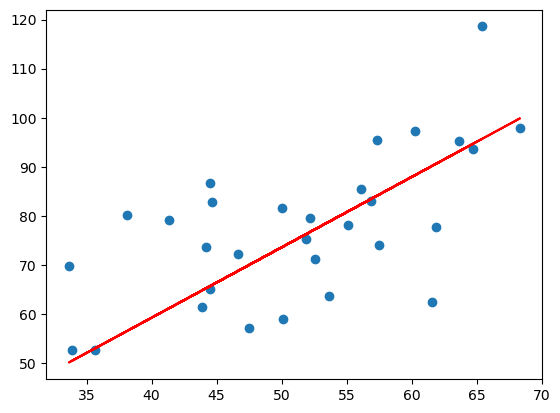

In [33]:
import matplotlib.pyplot as plt
plt.scatter(X_test,Y_test)
plt.plot(X_test,Y_test_predict,"r")
plt.show()